In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd

(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

xtrain.shape,ytrain.shape
ytrain,ytest=ytrain.flatten(),ytest.flatten()

xtrain=xtrain/255.0
xtest=xtest/255.0

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,GlobalMaxPooling2D,MaxPooling2D,Conv2D
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.layers import Activation

model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=xtrain[0].shape,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling2D())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [3]:
adam=Adam(learning_rate=0.0001)

model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
1563/1563 [==============================] - 25s 14ms/step - loss: 2.0736 - accuracy: 0.3095 - val_loss: 1.8209 - val_accuracy: 0.3670
Epoch 2/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5010 - accuracy: 0.4510 - val_loss: 1.8319 - val_accuracy: 0.3941
Epoch 3/50
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2752 - accuracy: 0.5391 - val_loss: 1.4907 - val_accuracy: 0.4835
Epoch 4/50
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1206 - accuracy: 0.5960 - val_loss: 1.0667 - val_accuracy: 0.6258
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0107 - accuracy: 0.6388 - val_loss: 1.1237 - val_accuracy: 0.5992
Epoch 6/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9167 - accuracy: 0.6756 - val_loss: 0.8238 - val_accuracy: 0.7107
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8419 - accuracy: 0.7038 - val_loss: 0.7816 -

<AxesSubplot:>

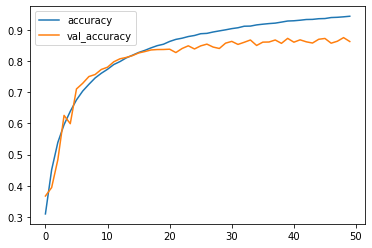

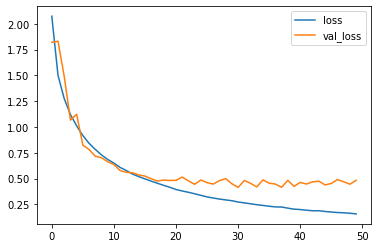

In [4]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()